### Practicant amb training i test sets

##### Descripció

Familiaritza't amb la programació científica mitjantçant la llibreria SKLearn / Scikitlearn.

In [119]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler



- Exercici 1\
Parteix el conjunt de dadesDelayedFlights.csv en train i test. Estudia els dos conjunts per separat, a nivell descriptiu.



In [120]:
flightsdf = pd.read_csv('DelayedFlights.csv')
flightsdf.head(3)

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [121]:
flightsdf.columns

Index(['Unnamed: 0', 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime',
       'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum',
       'TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [122]:
flightsdf.drop(['Unnamed: 0', 'Year', 'FlightNum', 'TailNum', 'TaxiIn', 'TaxiOut', 'CancellationCode'], axis=1, inplace=True)

In [123]:
flightsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 23 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Month              int64  
 1   DayofMonth         int64  
 2   DayOfWeek          int64  
 3   DepTime            float64
 4   CRSDepTime         int64  
 5   ArrTime            float64
 6   CRSArrTime         int64  
 7   UniqueCarrier      object 
 8   ActualElapsedTime  float64
 9   CRSElapsedTime     float64
 10  AirTime            float64
 11  ArrDelay           float64
 12  DepDelay           float64
 13  Origin             object 
 14  Dest               object 
 15  Distance           int64  
 16  Cancelled          int64  
 17  Diverted           int64  
 18  CarrierDelay       float64
 19  WeatherDelay       float64
 20  NASDelay           float64
 21  SecurityDelay      float64
 22  LateAircraftDelay  float64
dtypes: float64(12), int64(8), object(3)
memory usage: 339.9+ MB


In [124]:
flightsdf.describe(include = 'all').round(1)

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,...,Origin,Dest,Distance,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1936758.0,1936758.0,1936758.0,1936758.0,1936758.0,1929648.0,1936758.0,1936758,1928371.0,1936560.0,...,1936758,1936758,1936758.0,1936758.0,1936758.0,1247488.0,1247488.0,1247488.0,1247488.0,1247488.0
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,NaN,NaN,...,303,304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WN,NaN,NaN,...,ATL,ORD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,377602,NaN,NaN,...,131613,108984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,6.1,15.8,4.0,1518.5,1467.5,1610.1,1634.2,NaN,133.3,134.3,...,NaN,NaN,765.7,0.0,0.0,19.2,3.7,15.0,0.1,25.3
std,3.5,8.8,2.0,450.5,424.8,548.2,464.6,NaN,72.1,71.3,...,NaN,NaN,574.5,0.0,0.1,43.5,21.5,33.8,2.0,42.1
min,1.0,1.0,1.0,1.0,0.0,1.0,0.0,NaN,14.0,-25.0,...,NaN,NaN,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,3.0,8.0,2.0,1203.0,1135.0,1316.0,1325.0,NaN,80.0,82.0,...,NaN,NaN,338.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,6.0,16.0,4.0,1545.0,1510.0,1715.0,1705.0,NaN,116.0,116.0,...,NaN,NaN,606.0,0.0,0.0,2.0,0.0,2.0,0.0,8.0
75%,9.0,23.0,6.0,1900.0,1815.0,2030.0,2014.0,NaN,165.0,165.0,...,NaN,NaN,998.0,0.0,0.0,21.0,0.0,15.0,0.0,33.0


In [125]:
flightsdf.shape

(1936758, 23)

In [126]:
flightsdf.isnull().sum()

Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                7110
CRSArrTime                0
UniqueCarrier             0
ActualElapsedTime      8387
CRSElapsedTime          198
AirTime                8387
ArrDelay               8387
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
Cancelled                 0
Diverted                  0
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
dtype: int64

In [127]:
flightsdf.isnull().sum() / len(flightsdf) * 100

Month                 0.000000
DayofMonth            0.000000
DayOfWeek             0.000000
DepTime               0.000000
CRSDepTime            0.000000
ArrTime               0.367108
CRSArrTime            0.000000
UniqueCarrier         0.000000
ActualElapsedTime     0.433043
CRSElapsedTime        0.010223
AirTime               0.433043
ArrDelay              0.433043
DepDelay              0.000000
Origin                0.000000
Dest                  0.000000
Distance              0.000000
Cancelled             0.000000
Diverted              0.000000
CarrierDelay         35.588855
WeatherDelay         35.588855
NASDelay             35.588855
SecurityDelay        35.588855
LateAircraftDelay    35.588855
dtype: float64

In [128]:
# - We can erase the rows for variables with less than 0.5% of NaN.
# - 35% of NaN is a lot, may be due to little delays of less than 10 or 15 minutes 
# are not considered. We can´t just erase the rows, we´ll set them to '0'.

In [129]:
new_flightsdf = flightsdf.dropna(subset = ['ArrTime', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay'])

In [130]:
df = new_flightsdf.fillna(0)

In [131]:
df.isnull().sum()

Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
UniqueCarrier        0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Origin               0
Dest                 0
Distance             0
Cancelled            0
Diverted             0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
dtype: int64

In [132]:
df.head(3)

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,...,Origin,Dest,Distance,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,1,3,4,2003.0,1955,2211.0,2225,WN,128.0,150.0,...,IAD,TPA,810,0,0,0.0,0.0,0.0,0.0,0.0
1,1,3,4,754.0,735,1002.0,1000,WN,128.0,145.0,...,IAD,TPA,810,0,0,0.0,0.0,0.0,0.0,0.0
2,1,3,4,628.0,620,804.0,750,WN,96.0,90.0,...,IND,BWI,515,0,0,0.0,0.0,0.0,0.0,0.0


In [133]:
df.shape

(1928371, 23)

In [148]:
# Save it to use in later exercices
df_delayed_clean = df
df_delayed_clean.to_csv('df_delayed_clean.csv')

In [134]:
train, test = train_test_split(df, test_size = 0.2, random_state = 1)

In [135]:
train

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,...,Origin,Dest,Distance,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1440284,9,22,1,1313.0,1250,1439.0,1405,WN,146.0,135.0,...,JAX,HOU,816,0,0,0.0,0.0,11.0,0.0,23.0
1532343,10,14,2,1511.0,1455,1647.0,1645,WN,96.0,110.0,...,PHX,RNO,601,0,0,0.0,0.0,0.0,0.0,0.0
699790,4,8,2,1033.0,1010,1538.0,1535,AA,185.0,205.0,...,SNA,STL,1570,0,0,0.0,0.0,0.0,0.0,0.0
1013624,6,2,1,2013.0,1955,2154.0,2130,MQ,41.0,35.0,...,GRB,MQT,134,0,0,0.0,0.0,6.0,0.0,18.0
256011,2,8,5,1708.0,1525,2022.0,1846,UA,134.0,141.0,...,DEN,ORD,888,0,0,96.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493164,3,10,1,1017.0,1010,1230.0,1233,FL,73.0,83.0,...,MSY,ATL,425,0,0,0.0,0.0,0.0,0.0,0.0
1847779,12,21,7,1405.0,1315,1648.0,1540,EV,163.0,145.0,...,SYR,ATL,793,0,0,27.0,0.0,18.0,0.0,23.0
472775,3,18,2,1001.0,912,1042.0,937,DL,101.0,85.0,...,ATL,MEM,332,0,0,49.0,0.0,16.0,0.0,0.0
493658,3,13,4,1853.0,1843,1925.0,1912,FL,92.0,89.0,...,ATL,MSY,425,0,0,0.0,0.0,0.0,0.0,0.0


In [136]:
test

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,...,Origin,Dest,Distance,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
946177,6,7,6,1121.0,1042,1257.0,1214,OO,96.0,92.0,...,TUS,LAX,451,0,0,39.0,0.0,4.0,0.0,0.0
1490024,9,22,1,1844.0,1835,1946.0,1945,MQ,62.0,70.0,...,MAF,DFW,309,0,0,0.0,0.0,0.0,0.0,0.0
1572676,10,18,6,1624.0,1615,1716.0,1717,US,112.0,122.0,...,CLT,ORD,599,0,0,0.0,0.0,0.0,0.0,0.0
1261096,7,8,2,1748.0,1720,2017.0,1920,DL,149.0,120.0,...,ATL,DCA,547,0,0,0.0,0.0,57.0,0.0,0.0
653536,4,4,5,1653.0,1640,1725.0,1717,EV,92.0,97.0,...,CVG,MEM,403,0,0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199440,7,30,3,1523.0,1455,1650.0,1620,MQ,87.0,85.0,...,BTR,DFW,383,0,0,0.0,0.0,2.0,0.0,28.0
1313436,8,28,4,1335.0,1205,1600.0,1419,OH,85.0,74.0,...,ORD,CVG,264,0,0,0.0,0.0,11.0,0.0,90.0
1211268,7,15,2,1907.0,1850,2203.0,2145,NW,116.0,115.0,...,MSP,BUF,734,0,0,17.0,0.0,1.0,0.0,0.0
633703,4,7,1,1109.0,1045,1210.0,1150,UA,121.0,125.0,...,DCA,ORD,612,0,0,0.0,0.0,0.0,0.0,20.0


In [137]:
train.shape

(1542696, 23)

In [138]:
test.shape

(385675, 23)

In [139]:
round(train.describe(include = 'all'), 2)

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,...,Origin,Dest,Distance,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1542696.00,1542696.00,1542696.00,1542696.00,1542696.00,1542696.00,1542696.00,1542696,1542696.00,1542696.00,...,1542696,1542696,1542696.00,1542696.0,1542696.0,1542696.00,1542696.00,1542696.00,1542696.00,1542696.00
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,NaN,NaN,...,303,302,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WN,NaN,NaN,...,ATL,ORD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,301247,NaN,NaN,...,105043,86512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,6.11,15.75,3.99,1518.62,1467.76,1610.14,1634.16,NaN,133.30,134.19,...,NaN,NaN,764.90,0.0,0.0,12.41,2.40,9.71,0.06,16.34
std,3.48,8.78,2.00,450.45,424.73,548.01,464.68,NaN,72.06,71.23,...,NaN,NaN,573.81,0.0,0.0,36.12,17.53,28.12,1.68,35.88
min,1.00,1.00,1.00,1.00,0.00,1.00,0.00,NaN,14.00,-21.00,...,NaN,NaN,11.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00
25%,3.00,8.00,2.00,1203.00,1135.00,1316.00,1325.00,NaN,80.00,82.00,...,NaN,NaN,338.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00
50%,6.00,16.00,4.00,1545.00,1510.00,1715.00,1705.00,NaN,116.00,116.00,...,NaN,NaN,606.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00
75%,9.00,23.00,6.00,1900.00,1815.00,2031.00,2015.00,NaN,165.00,165.00,...,NaN,NaN,997.25,0.0,0.0,10.00,0.00,6.00,0.00,18.00


In [140]:
round(test.describe(include = 'all'), 2)

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,...,Origin,Dest,Distance,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,385675.00,385675.00,385675.00,385675.00,385675.00,385675.00,385675.00,385675,385675.00,385675.00,...,385675,385675,385675.00,385675.0,385675.0,385675.00,385675.00,385675.00,385675.00,385675.00
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,NaN,NaN,...,298,301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WN,NaN,NaN,...,ATL,ORD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74954,NaN,NaN,...,26170,21753,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,6.11,15.77,3.98,1518.75,1467.55,1610.67,1634.34,NaN,133.33,134.22,...,NaN,NaN,765.12,0.0,0.0,12.41,2.36,9.76,0.05,16.45
std,3.47,8.77,2.00,450.38,424.71,547.95,464.43,NaN,72.06,71.26,...,NaN,NaN,574.21,0.0,0.0,36.54,16.77,28.22,1.39,36.08
min,1.00,1.00,1.00,1.00,0.00,1.00,0.00,NaN,15.00,15.00,...,NaN,NaN,31.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00
25%,3.00,8.00,2.00,1203.00,1135.00,1316.00,1325.00,NaN,80.00,82.00,...,NaN,NaN,338.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00
50%,6.00,16.00,4.00,1546.00,1510.00,1716.00,1706.00,NaN,116.00,116.00,...,NaN,NaN,606.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00
75%,9.00,23.00,6.00,1900.00,1815.00,2030.00,2014.00,NaN,165.00,165.00,...,NaN,NaN,997.00,0.0,0.0,10.00,0.00,6.00,0.00,18.00


In [142]:
sample_train = train.sample(frac=0.1)
sample_test = test.sample(frac=0.2)

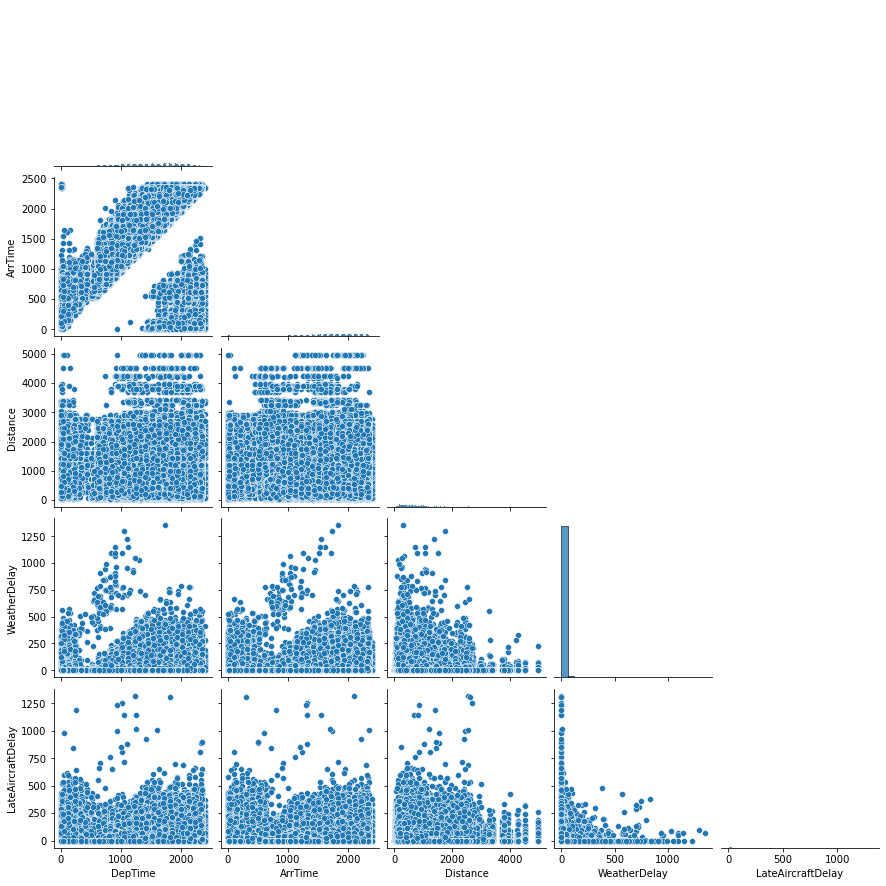

In [143]:
sns.pairplot(train, vars = ['DepTime', 'ArrTime', 'Distance', 'WeatherDelay', 'LateAircraftDelay'], corner = True);

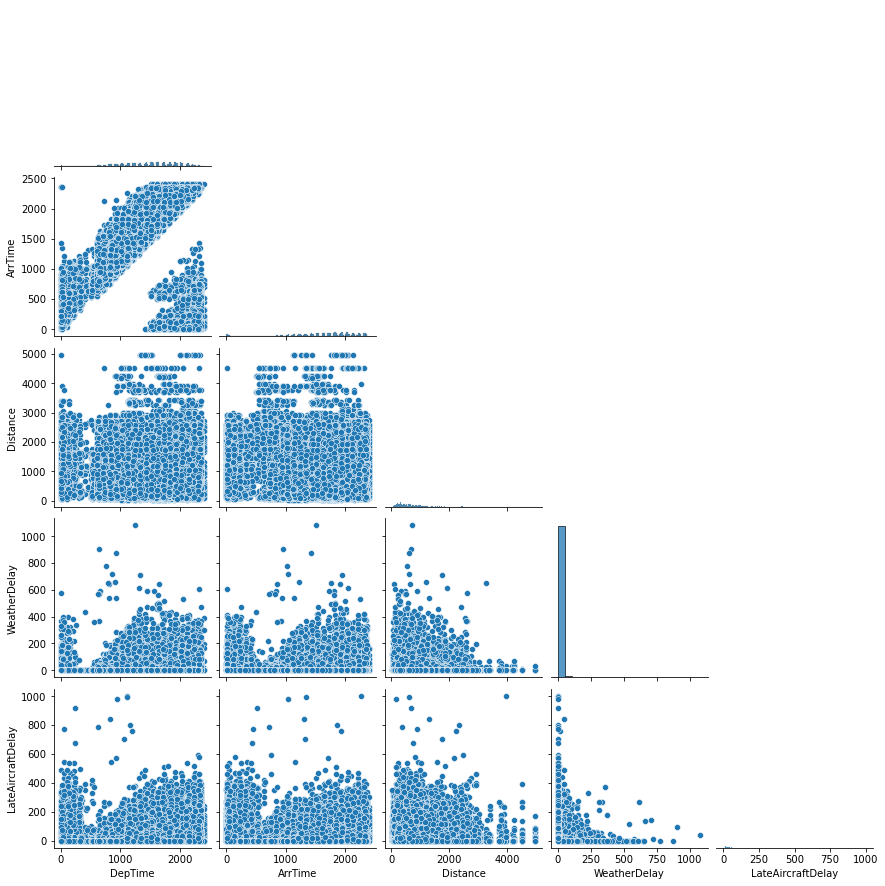

In [144]:
sns.pairplot(test, vars = ['DepTime', 'ArrTime', 'Distance', 'WeatherDelay', 'LateAircraftDelay'], corner = True);

Repositori: SkLearn_Train_Test 

______